###### Project 01

## Arpita Das
## TuId: 916103845
## Date of Submission: 10/17/2022

## [2] Figure out how to import the data into Python/Jupyter. You can use the csv library or the pandas library.

In [1]:
# importing necessary libraries
import pandas as pd
import datetime as dt

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns


### Importing data

In [2]:
data = pd.read_csv(r'indego-trips-2019-q2.csv')

# Checking total no. of rowns and columns (Total no of rows = total no of rides)
data.shape

# Display the dataframe head
# data.head()

(206354, 15)

### Data Processing

In [3]:
# settings to display all rows
pd.set_option("display.max_rows", None)

# Converting date-time column to datetime format
data['start_time'] = pd.to_datetime(data.start_time)
data['end_time'] = pd.to_datetime(data.end_time)

data.index = data['start_time']
data.index = data['end_time']

# data.head()

In [4]:
# Keeping only the necessary columns from the data
mod_data = data.loc[:,["start_time","end_time"]]

# Seperating date and time from date-time columns
start_date, Start_time = zip(*[(d.date(), d.time()) for d in mod_data['start_time']])
mod_data = mod_data.assign(start_date = start_date, Start_time = Start_time)

end_date, End_time = zip(*[(d.date(), d.time()) for d in mod_data['end_time']])
mod_data = mod_data.assign(end_date = end_date, End_time = End_time)

# Removing redundant columns 
mod_data.pop('start_time')
mod_data.pop('end_time')


# Checking the number of rows and columns to verify if the codes worked
mod_data.shape


(206354, 4)

## [3] Determine and plot the probability mass function of average number of rides per day. What are the expected value and variance?

#### Calculating and plotting  average number of rides per day in the given 3 months period

<AxesSubplot:xlabel='Days', ylabel='Number of rides in a particular day'>

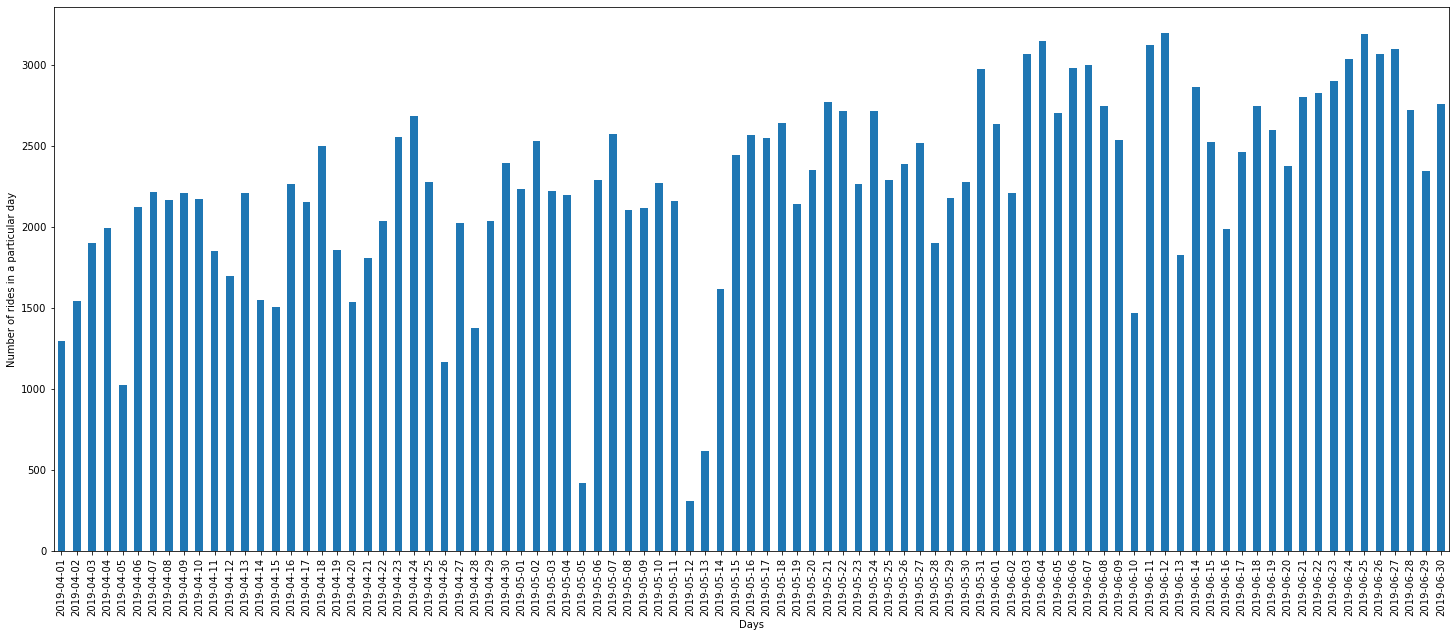

In [5]:
# Calculating
average_number_of_rides_per_day = mod_data['start_date'].value_counts()

# Plotting
average_number_of_rides_per_day.sort_index(axis = 0).plot(kind="bar", figsize = (25,10), xlabel = 'Days'
                                           , ylabel = 'Number of rides in a particular day')



#### Determining and plotting the probability mass function of average number of rides per day

Text(0, 0.5, 'Probability')

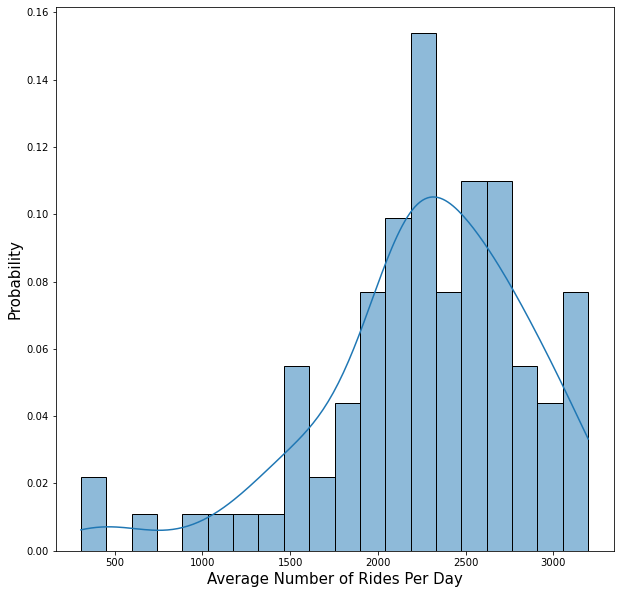

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
fig = sns.histplot(average_number_of_rides_per_day, stat='probability', bins=20, kde=True, ax=ax)
fig.set_xlabel("Average Number of Rides Per Day", fontsize = 15)
fig.set_ylabel("Probability", fontsize = 15)

### The line smoothes the normalization. 

#### Calculating expected value and variance

In [7]:
print("Expected value simulated   = " + f"{average_number_of_rides_per_day.mean():0.3f}")


print("Variance       simulated   = " + f"{average_number_of_rides_per_day.var():0.3f}")

Expected value simulated   = 2267.626
Variance       simulated   = 348367.948


## [4] Determine and plot the conditional probability mass function of the average number of rides at night (defined as 6pm-6am). What are the expected value and variance?

#### Filtering the data between the given time interval (6pm-6am)

In [8]:
new_data = mod_data.between_time('18:00','06:00', inclusive = "both")

#### Calculating and plotting the average number of rides at night (defined as 6pm-6am)

<AxesSubplot:xlabel='Time of Night', ylabel='Number of rides at night'>

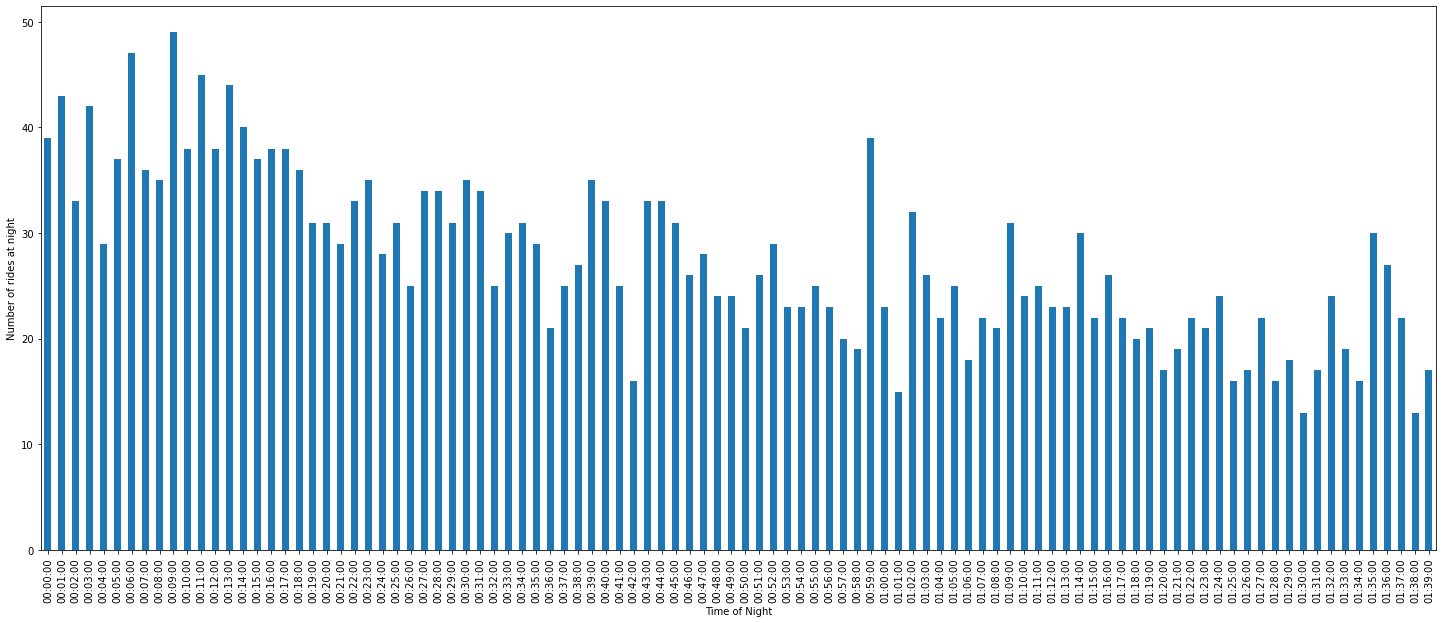

In [9]:
# Calculating
average_number_of_rides_at_night = new_data['Start_time'].value_counts().sort_index(axis = 0) # Counting average number of rides per date and per minute

# Plotting
average_number_of_rides_at_night[:100].plot(kind="bar", figsize = (25,10), xlabel = 'Time of Night'
                                           , ylabel = 'Number of rides at night') # Displaying results only for first 100 instances

#### Determining and plotting the conditional probability mass function of the average number of rides at night 

Text(0, 0.5, 'Probability')

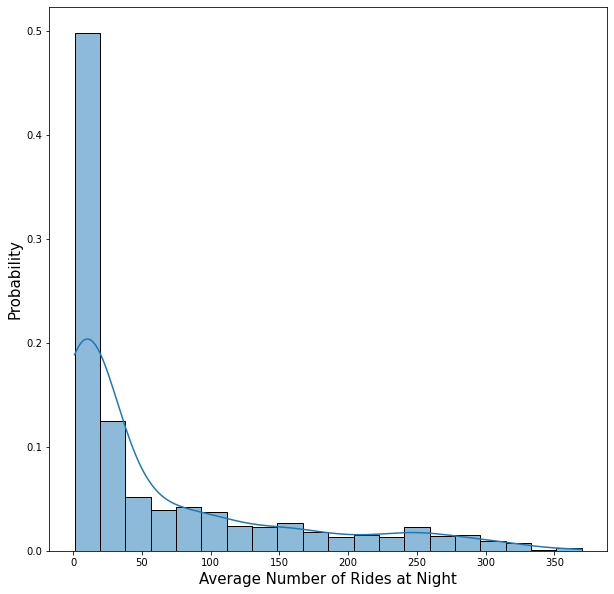

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
fig = sns.histplot(average_number_of_rides_at_night, stat='probability', bins=20, kde=True, ax=ax)
fig.set_xlabel("Average Number of Rides at Night", fontsize = 15)
fig.set_ylabel("Probability", fontsize = 15)

#### Calculating Expected value and variance

In [11]:
print("Expected value simulated   = " + f"{average_number_of_rides_at_night.mean():0.3f}")


print("Variance       simulated   = " + f"{average_number_of_rides_at_night.var():0.3f}")

Expected value simulated   = 61.595
Variance       simulated   = 7051.403


## [5] Determine and plot the probability mass function of the average number rides as a function of hour (0-23). What are the expected value and variance?


#### Calculating and plotting average number rides as a function of hour (0-23)

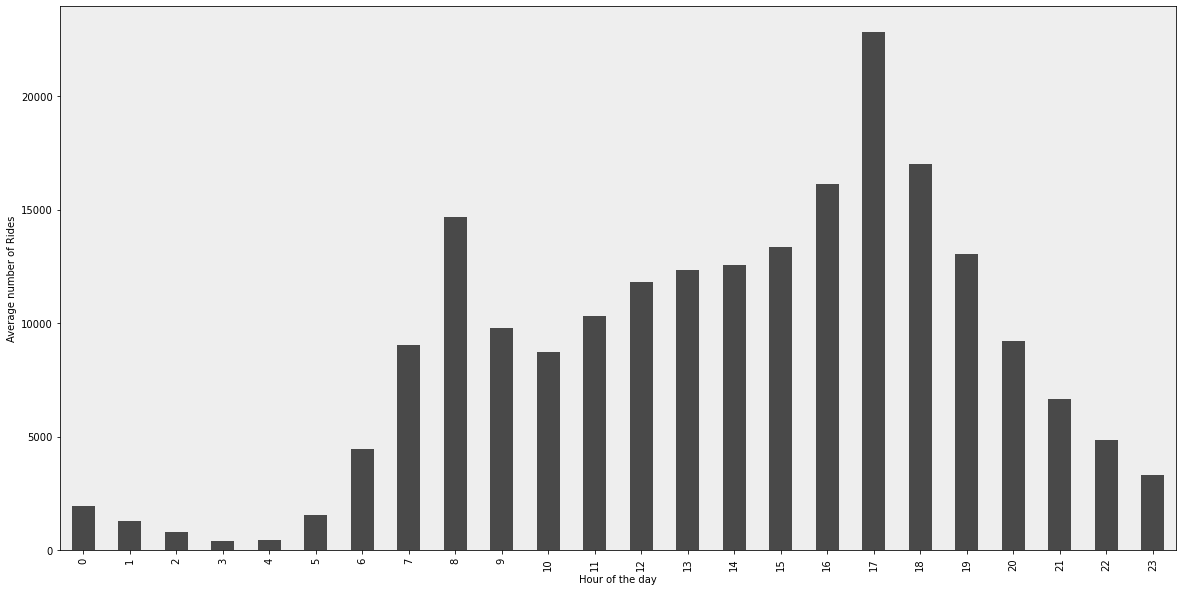

In [13]:
# Calculating
# average number of rides per hour
average_number_rides_per_hour = data['start_time'].groupby(data['start_time'].dt.hour).count() 

# Plotting
plt.figure(figsize=(20, 10))
ax = (average_number_rides_per_hour).plot(kind = "bar", color = '#494949')
ax.set_facecolor('#eeeeee')
ax.set_xlabel("Hour of the day")
ax.set_ylabel("Average number of Rides")
plt.show()

#### Determining and plotting the probability mass function of the average number rides as a function of hour

Text(0, 0.5, 'Probability')

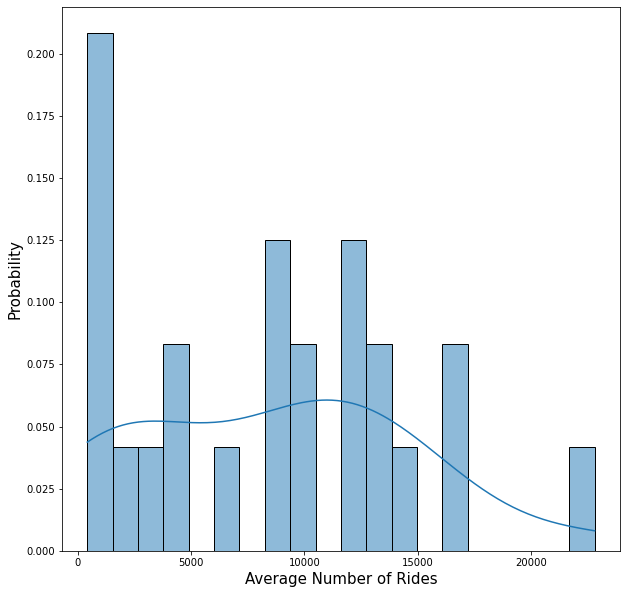

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
fig = sns.histplot(average_number_rides_per_hour.sort_index(), stat='probability', bins=20, kde=True, ax=ax)
fig.set_xlabel("Average Number of Rides", fontsize = 15)
fig.set_ylabel("Probability", fontsize = 15)

#### Calculating Expected value and variance

In [15]:
# print results
print("Expected value simulated   = " + f"{average_number_rides_per_hour.mean():0.3f}")


print("Variance       simulated   = " + f"{average_number_rides_per_hour.var():0.3f}")

Expected value simulated   = 8598.083
Variance       simulated   = 37335298.601


### [6] Compute the correlation (*not covariance*) between time of day (hour and minute) and number of rides.



#### Computing and plotting number of rides for the given condition

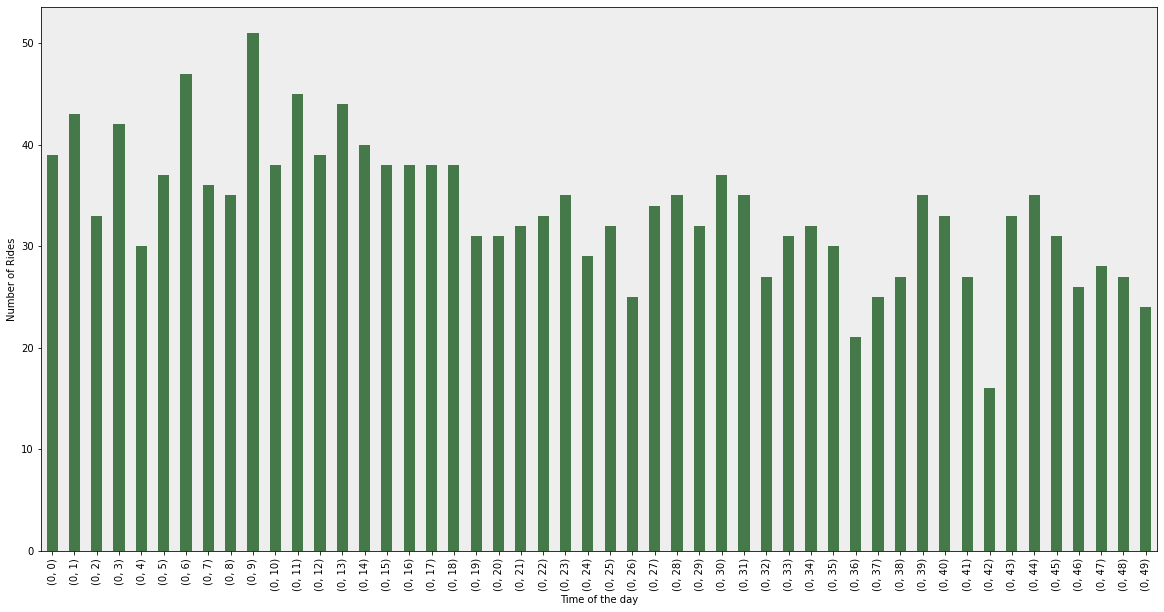

In [16]:
# Computing
# Average number of rides per hour and per minute
no_of_rides = data['start_time'].groupby([data["start_time"].dt.hour, data["start_time"].dt.minute]).count()

# Plotting
plt.figure(figsize=(20, 10))
ax = (no_of_rides[:50]).plot(kind = "bar", color = '#457949') # Displaying the result for the first 50 instances only
ax.set_facecolor('#eeeeee')
ax.set_xlabel("Time of the day")
ax.set_ylabel("Number of Rides")
plt.show()                                                                                                       

#### Computing the correlation (not covariance) between time of day (hour and minute) and number of rides

In [17]:
corr = no_of_rides[:, 0].corr(no_of_rides[:, 1])
                              
print("Correlation  between time of day (hour and minute) and number of rides {simulated} = " + f"{corr:0.4f}" )

Correlation  between time of day (hour and minute) and number of rides {simulated} = 0.9843


### It means that time of day (hour and minute) and number of rides are highly correlated with each other, since the correlation is almost eqaul to 1. Correlation of 1 means perfect positive correlation. 

## [7] Limiting yourself to rides taken between 4:30 and 6:30pm on weekdays, how well does a poisson process model the rate at which bikes are checked out?

#### At first, the weekdays are found out assuming that the week starts on Monday, which is denoted by 0 and ends on Sunday which is denoted by 6. 

In [18]:
# Defining the days to set up the logic
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
}

# Manipulating data to give the name of days 
data['day_of_week'] = data['start_time'].dt.dayofweek
data['day_of_week_name']=data['start_time'].dt.weekday.map(dw_mapping)

# data.head()[:50]

#### Filtering the data by weekdays

In [19]:
# Setting up the logic to find out the weekdays
boolean = data['day_of_week_name'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

# boolean.head()

# Applying the boolean logic to filter the data for weekdays
new_data2 = data[boolean]

new_data2.shape

(151521, 17)

#### Again filtering the above filtered for the given time interval ( between 4:30 pm and 6:30 pm )

In [20]:
new_data3 = new_data2.between_time('16:30:00','18:30:00', inclusive = 'both')

#### Calculating and plotting the number of rides for the given condition 

<AxesSubplot:xlabel='Days', ylabel='Number of rides'>

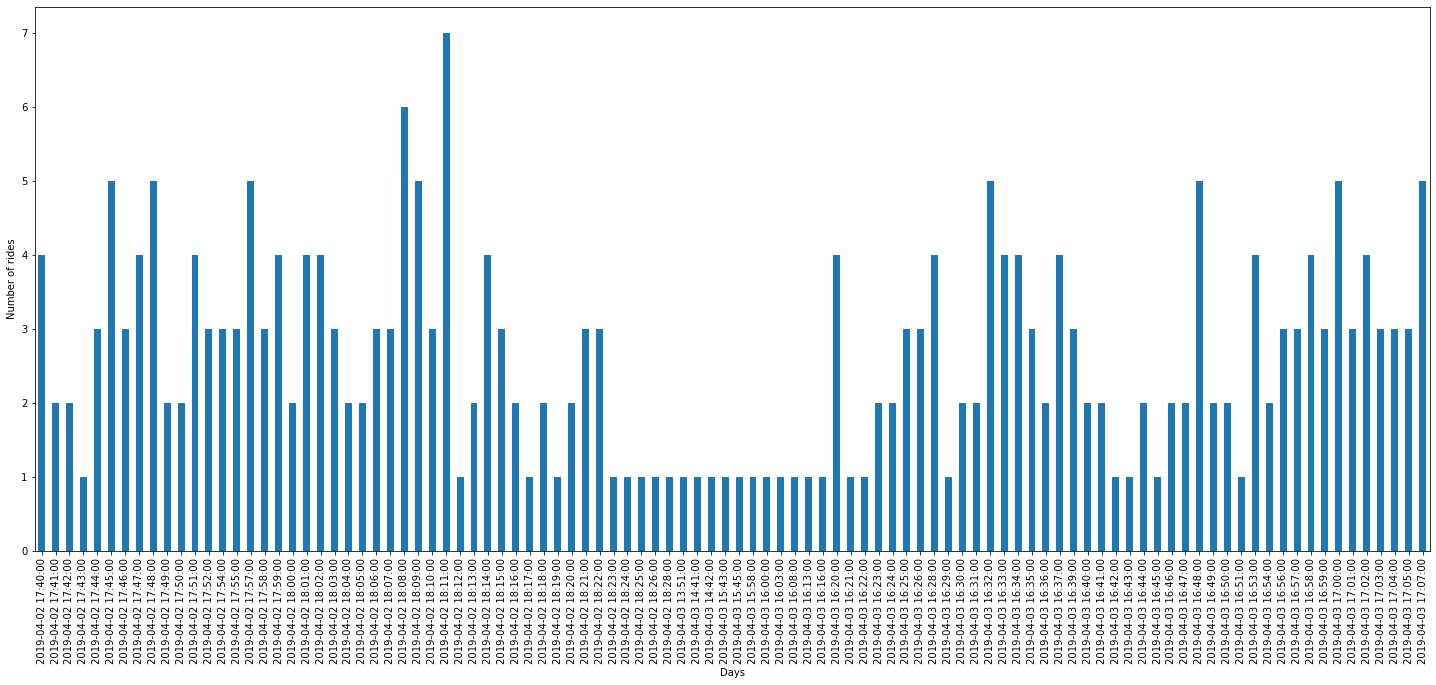

In [21]:
# Calculating
number_of_rides_weekdays = new_data3['start_time'].value_counts().sort_index(axis = 0)

# Plotting
number_of_rides_weekdays[200:300].plot(kind="bar", figsize = (25,10), xlabel = 'Days'
                                           , ylabel = 'Number of rides') # Displaying the result for a portion of instances

#### Modelling the rate at which bikes are checked out using Poisson process

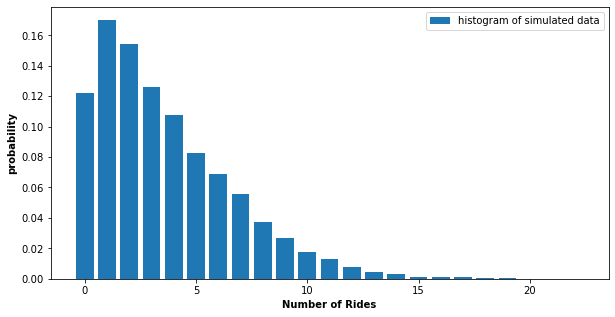

In [22]:
tot_rides = number_of_rides_weekdays.shape[0] # Total number of rides for the weekdays
total_rides_weekdays = number_of_rides_weekdays # Number of rides for each instance taken

x   = stats.poisson(total_rides_weekdays).rvs(tot_rides)

x_unique , cnts = np.unique(x , return_counts=True) # Counting the unique value of the rides

# print(x_unique) 

fig = plt.figure(figsize = (10, 5))
plt.bar(  x_unique, cnts / cnts.sum(), label='histogram of simulated data')
plt.xlabel('Number of Rides', fontweight ='bold')
plt.ylabel('probability', fontweight ='bold')
plt.legend()
plt.show()
